# Loading the database and some preprocessing

In [1]:
from data_collection import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
from datetime import timedelta
from itertools import product
import pickle
from matplotlib.colors import to_rgba
import matplotlib_venn as venn

In [2]:
# this returns OUR data headers
event_header, mention_header = headers()

In [4]:
# this reads the full event dataset (partial reading is possible)
#events = read_events()
# this reads the full mention dataset (partial reading is possible)
#mentions = read_mentions()

In [3]:
events = read_events(usecols = ['GlobalEventID', 'DATEADDED'])
mentions = read_mentions(usecols = ['GlobalEventID', 'MentionTimeDate'])
events.set_index("GlobalEventID", inplace=True)
mentions.set_index("GlobalEventID", inplace=True)

In [4]:
mentions = mentions[mentions.index.isin(events.index)]

In [5]:
mentions=mentions['MentionTimeDate']-events.loc[mentions.index]['DATEADDED']

In [51]:
len(events)

61544481

In [6]:
mentions=mentions.loc[mentions.index.value_counts()>1]

In [11]:
len(mentions.index.unique())

17840808

In [12]:
17840808/61544481 #percentage of events with more than one mentions

0.2898847745584206

In [53]:
(mentions > timedelta(days = 35)) #number of mentions with a delta greater than 35 days

GlobalEventID
719213357    False
719213357    False
719210440    False
719194654    False
719193064    False
             ...  
813254249    False
813254249    False
813254250    False
813254250    False
813254250    False
Length: 168143898, dtype: bool

# Distribution of the Overall Database

In [7]:
days = (mentions/timedelta(days=1)).to_numpy()

In [8]:
val, coor = np.histogram(days, bins = np.arange(0,35))

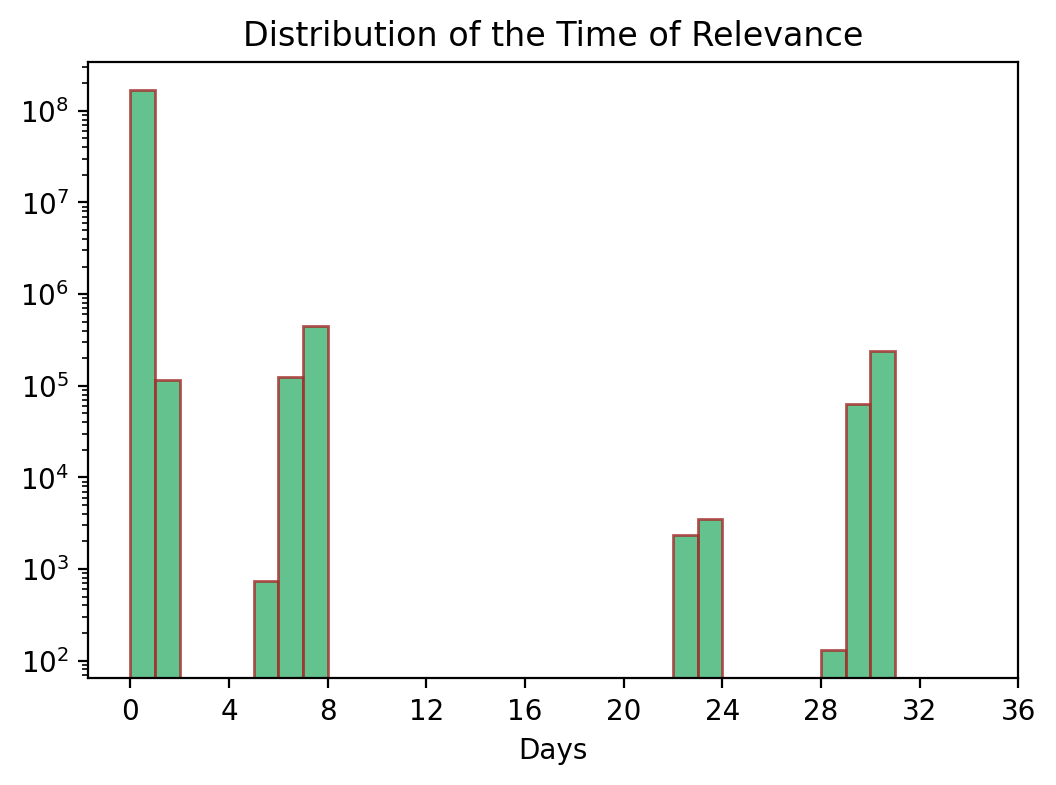

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=200)

plt.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8)
plt.yscale('log')
plt.xticks([0,4,8,12,16,20,24,28,32,36])
plt.title('Distribution of the Time of Relevance')
plt.xlabel('Days')
plt.savefig('total_distribution.png', dpi = 200, bbox_inches = 'tight')
plt.show()

# Distribution of the last mention between 0 and 28 hours

In [19]:
mentions_0_3_days=mentions[mentions <= timedelta(days = 2)]

In [20]:
mentions_0_3_days=mentions_0_3_days.groupby('GlobalEventID')

In [21]:
mentions_0_3_days = mentions_0_3_days.max() - mentions_0_3_days.min()

In [22]:
mentions_0_3_days = pd.DataFrame(mentions_0_3_days)

In [23]:
mentions_0_3_days=mentions_0_3_days[mentions_0_3_days > timedelta(days = 0)]

In [32]:
days = (mentions_0_3_days/pd.Timedelta(hours=1).to_numpy())

In [43]:
val, coor = np.histogram(days, bins = np.arange(0,29))

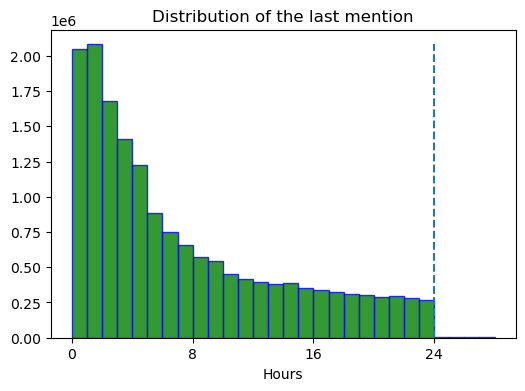

In [54]:
f, ax = plt.subplots( figsize = (6,4))

ndays = 1
start = 0
days = (mentions_0_3_days/pd.Timedelta(hours=1).to_numpy())
val, coor = np.histogram(days, bins = np.arange(0,29))
coor -= start*24

ax.bar(coor[:-1], val,align = 'edge', color = 'green', edgecolor = 'blue', width = 1, alpha = 0.8, log = False)
ax.set_xticks(np.arange(0,24*ndays+1,8))
ax.set_title('Distribution of the last mention')
ax.set_xlabel(f'Hours')

ax.plot([24]*50, np.linspace(0, val.max(), 50), '--', label = '24 Hours')


plt.savefig('last_mentions_not_log.png', dpi = 200, bbox_inches = 'tight')
plt.show()

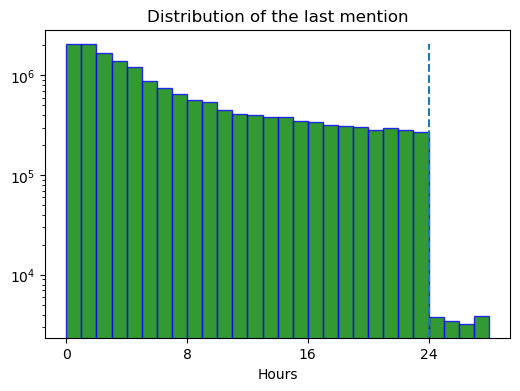

In [50]:
f, ax = plt.subplots( figsize = (6,4))

ndays = 1
start = 0
days = (mentions_0_3_days/pd.Timedelta(hours=1).to_numpy())
val, coor = np.histogram(days, bins = np.arange(0,29))
coor -= start*24

ax.bar(coor[:-1], val,align = 'edge', color = 'green', edgecolor = 'blue', width = 1, alpha = 0.8, log = True)
ax.set_xticks(np.arange(0,24*ndays+1,8))
ax.set_title('Distribution of the last mention')
ax.set_xlabel(f'Hours')

ax.plot([24]*50, np.linspace(0, val.max(), 50), '--', label = '24 Hours')


plt.savefig('last_mentions_not_log.png', dpi = 200, bbox_inches = 'tight')
plt.show()

# Overall Distribution of the last mentions between 3-10 days

In [55]:
mentions_3_10=mentions[(mentions >= timedelta(days = 3)) & (mentions <= timedelta(days = 10))]

In [56]:
mentions_3_10=mentions_3_10.groupby('GlobalEventID')

In [57]:
mentions_3_10 = mentions_3_10.max() - mentions_3_10.min()

In [58]:
mentions_3_10=mentions_3_10[mentions_3_10 > timedelta(days = 0)]

In [65]:
bins=(mentions_3_10/pd.Timedelta(hours=1)).max()-(mentions_3_10/pd.Timedelta(hours=1)).min()

<AxesSubplot:>

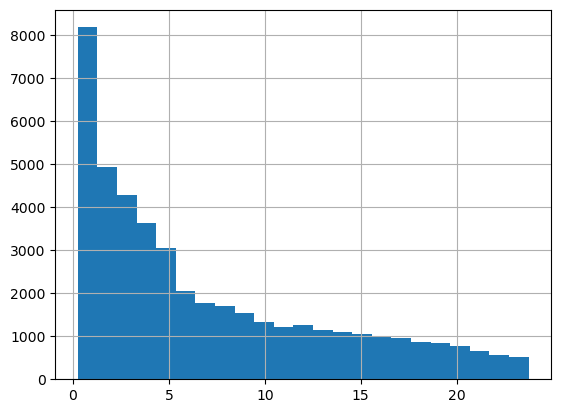

In [67]:
(mentions_3_10/pd.Timedelta(hours=1)).hist(bins=int(bins))

# Distribution of the min between 3-10 days

In [27]:
mentions_3_10_2=mentions[(mentions >= timedelta(days = 3)) & (mentions <= timedelta(days = 10))]

In [32]:
mentions_3_10_2=mentions_3_10_2-timedelta(days=5)

In [35]:
mentions_3_10_2=mentions_3_10_2.groupby('GlobalEventID')

<AxesSubplot:>

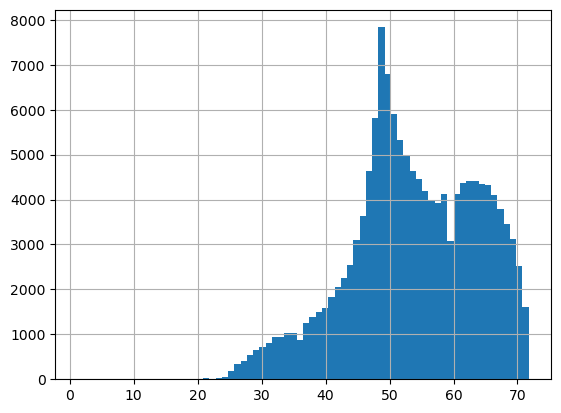

In [47]:
(mentions_3_10_2.min()/pd.Timedelta(hours=1)).hist(bins=72)

# Distribution of the max between 3-10 days

<AxesSubplot:>

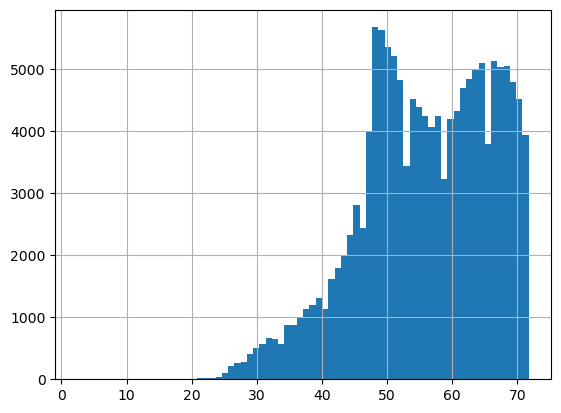

In [48]:
(mentions_3_10_2.max()/pd.Timedelta(hours=1)).hist(bins=72)

# Distribution of the counts

<AxesSubplot:>

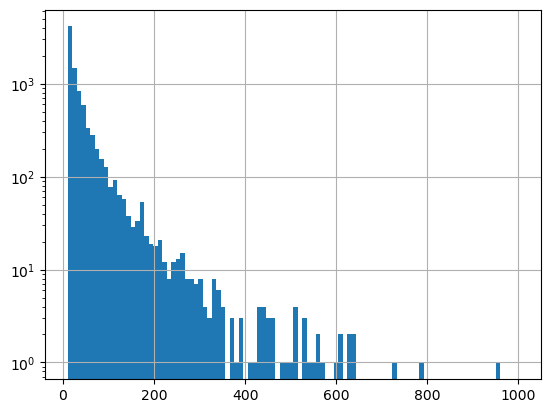

In [46]:
mentions_3_10_2.count().hist(range=(10,1000), log=True, bins=100)

# 20- 25 days analisis


In [49]:
mentions10_30=mentions[(mentions > timedelta(days = 10)) & (mentions <= timedelta(days = 33))]

In [51]:
mentions20_25=mentions10_30[(mentions10_30 > timedelta(days = 20)) & (mentions10_30 <= timedelta(days = 25))]

In [52]:
mentions20_25=mentions20_25-timedelta(days=21)

In [53]:
mentions20_25=mentions20_25.groupby('GlobalEventID')

In [60]:
len(mentions20_25)

570

<AxesSubplot:>

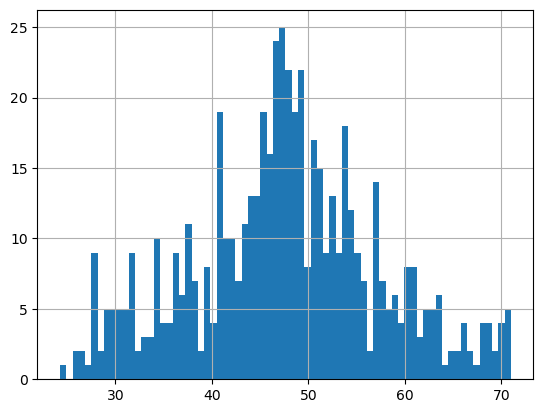

In [54]:
(mentions20_25.min()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

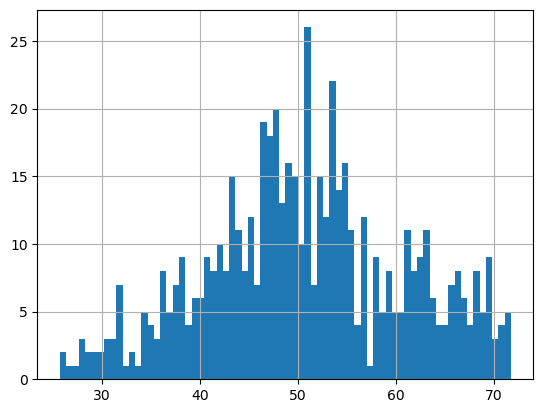

In [55]:
(mentions20_25.max()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

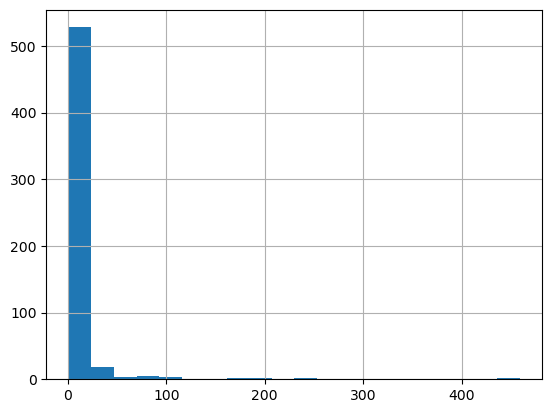

In [62]:
mentions20_25.count().hist(bins=20)

# 25-33 days analysis

In [63]:
mentions25_33=mentions10_30[(mentions10_30 > timedelta(days = 25)) & (mentions10_30 <= timedelta(days = 33))]

In [64]:
mentions25_33.min()

Timedelta('28 days 02:45:00')

In [76]:
mentions25_33.max().max()

Timedelta('2 days 23:45:00')

In [65]:
mentions25_33=mentions25_33-timedelta(days=28)

In [67]:
mentions25_33=mentions25_33.groupby('GlobalEventID')

In [68]:
len(mentions25_33)

72593

In [74]:
(mentions25_33.min()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

<AxesSubplot:>

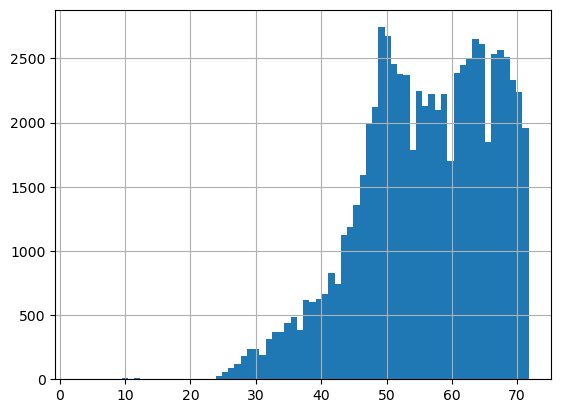

In [70]:
(mentions25_33.max()/pd.Timedelta(hours=1)).hist(bins=72)

<AxesSubplot:>

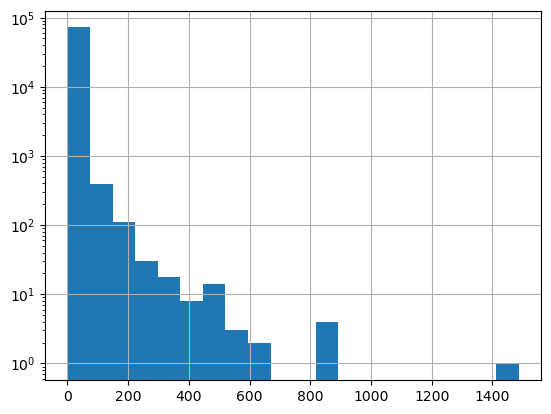

In [72]:
mentions25_33.count().hist(log=True, bins=20)

# Group definition

In [8]:
# groupA = [timedelta(hours = 0), timedelta(hours = 24)]
# groupA2 = [timedelta(hours = 24), timedelta(hours = 50)]
# groupB = [timedelta(days = 5), timedelta(days = 9)]
# groupC = [timedelta(days = 20), timedelta(days = 25)]
# groupD = [timedelta(days = 28), timedelta(days = 33)]

In [3]:
groupA = [timedelta(hours = 0), timedelta(hours = 24)]
groupA2 = [timedelta(hours = 24), timedelta(hours = 50)]
groupB = [timedelta(hours = 50), timedelta(days = 9)]
groupC = [timedelta(days = 9), timedelta(days = 25)]
groupD = [timedelta(days = 25), timedelta(days = 33)]

In [40]:
boolA = mentions.between(*groupA, inclusive='left')
boolA2= mentions.between(*groupA2, inclusive='left')
boolB = mentions.between(*groupB, inclusive='left')
boolC = mentions.between(*groupC, inclusive='left')
boolD = mentions.between(*groupD, inclusive='left')

In [2]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [42]:
df=mentions[boolA].groupby(level = 0).agg(A_min="min",A_max="max",A_count="count").join(
    [mentions[boolA2].groupby(level = 0).agg(A2_min="min",A2_max="max",A2_count="count")
       , mentions[boolB].groupby(level = 0).agg(B_min="min",B_max="max",B_count="count")
       , mentions[boolC].groupby(level = 0).agg(C_min="min",C_max="max",C_count="count")
       , mentions[boolD].groupby(level = 0).agg(D_min="min",D_max="max",D_count="count")], how='left')

In [43]:
for count in counts:
    df.loc[df[count].isna(), count]=int(0)

In [44]:
df[counts]=df[counts].astype("uint16")

In [45]:
df_day1=df.loc[(df[counts[1:]]>0).sum(axis=1)==0][['A_min', 'A_max', 'A_count']]

In [46]:
df=df.loc[(df[counts[1:]]>0).sum(axis=1)>0]

In [47]:
df.loc[:, mins+maxs]=df.loc[:, mins+maxs].apply(lambda x: x/timedelta(minutes=15) )

In [48]:
df[mins+maxs]=df[mins+maxs].astype("float32")

In [49]:
df.to_csv('../data/group_DF.tsv', sep='\t',header=True, index=True)

In [51]:
df_day1 = df_day1[df_day1['A_count']>1]

In [52]:
df_day1.loc[:, ['A_min', 'A_max']]=df_day1.loc[:,['A_min', 'A_max']].apply(lambda x: x/timedelta(minutes=15) )

In [53]:
df_day1[['A_min', 'A_max']]=df_day1[['A_min', 'A_max']].astype("float32")

In [55]:
df_day1.to_csv('../data/group_DF_day1.tsv', sep='\t',header=True, index=True)

In [6]:
def read_processed(usecols = None, skiprows=None, skipfooter=0, nrows=None, iterator=False, chunksize=None, **kwargs):
    '''
    usecols:     list-like or callable, optional
                 Return a subset of the columnsIf list-like, all elements must either be positional (i.e. integer indices into the document columns) or strings that correspond to column names provided either by the user in names or inferred from the document header row(s).
    skiprows:    list-like, int or callable, optional
                 Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
                 If callable, the callable function will be evaluated against the row indices, returning True if the row should be skipped and False otherwise. An example of a valid callable argument would be lambda x: x in [0, 2].
 
    skipfooter:  int, default 0
                 Number of lines at bottom of file to skip (Unsupported with engine=’c’).
 
    nrows:       int, optional
                 Number of rows of file to read. Useful for reading pieces of large files.
 
    iterator:    bool, default False
                 Return TextFileReader object for iteration or getting chunks with get_chunk().
 
    chunksize:   int, optional
                 Return TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.
    '''
    
    mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
    maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
    counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']
    
    processed_header = load_pickle('../data_utils/processed_header.pickle')
    df = pd.read_csv('../data/group_DF.tsv', sep = '\t' , dtype = processed_header, index_col=0, usecols = usecols, skiprows=skiprows, skipfooter=skipfooter, nrows=nrows, iterator=iterator, chunksize=chunksize, **kwargs)
    df.loc[:, mins+maxs]=df.loc[:, mins+maxs].apply(lambda x: x*timedelta(minutes=15) )
    
    return(df)

def read_processed_day1(usecols = None, skiprows=None, skipfooter=0, nrows=None, iterator=False, chunksize=None, **kwargs):
    '''
    usecols:     list-like or callable, optional
                 Return a subset of the columnsIf list-like, all elements must either be positional (i.e. integer indices into the document columns) or strings that correspond to column names provided either by the user in names or inferred from the document header row(s).
    skiprows:    list-like, int or callable, optional
                 Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
                 If callable, the callable function will be evaluated against the row indices, returning True if the row should be skipped and False otherwise. An example of a valid callable argument would be lambda x: x in [0, 2].
 
    skipfooter:  int, default 0
                 Number of lines at bottom of file to skip (Unsupported with engine=’c’).
 
    nrows:       int, optional
                 Number of rows of file to read. Useful for reading pieces of large files.
 
    iterator:    bool, default False
                 Return TextFileReader object for iteration or getting chunks with get_chunk().
 
    chunksize:   int, optional
                 Return TextFileReader object for iteration. See the IO Tools docs for more information on iterator and chunksize.
    '''
    
    processed_header = load_pickle('../data_utils/processed_header_day1.pickle')
    df = pd.read_csv('../data/group_DF_day1.tsv', sep = '\t' , dtype = processed_header, index_col=0, usecols = usecols, skiprows=skiprows, skipfooter=skipfooter, nrows=nrows, iterator=iterator, chunksize=chunksize, **kwargs)
    df.loc[:,['A_min', 'A_max']]=df.loc[:, ['A_min', 'A_max']].apply(lambda x: x*timedelta(minutes=15) )
    
    return(df)



# Analysis all together DF_Day1

In [3]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [6]:
df_day1=read_processed_day1()
# remember to remove A_min in the dataset
# it's just zeros (obv..)
# and rename the columns in the tsv
df_day1.drop('A_min', axis = 1, inplace = True)
df_day1.rename(columns={"A_max": "last_mention", 'A_count':'count'}, inplace = True)

In [7]:
df_day1.sort_values(by = 'last_mention', inplace = True)
df_day1['numbering'] = np.arange(len(df_day1))

In [67]:
df_day1['last_hour'] = df_day1['last_mention']/timedelta(minutes = 15)

In [21]:
(df_day1.last_mention/timedelta(hours=1)).hist()

<AxesSubplot:>

<AxesSubplot:>

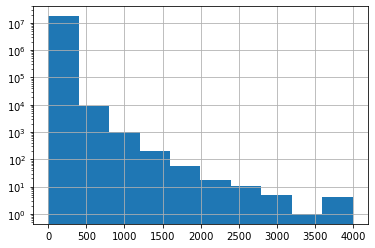

In [47]:
df_day1['count'].hist(log = True)#, bins = 10, range = [2000,3000])

<AxesSubplot:xlabel='numbering', ylabel='last_hour'>

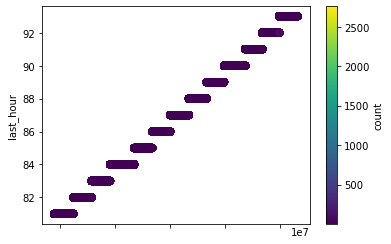

In [80]:
df_day1.loc[(df_day1['last_hour']>80)&(df_day1['last_hour']<94)].plot.scatter(y="last_hour", x='numbering', c="count",cmap="viridis", s=50)

<AxesSubplot:xlabel='count', ylabel='last_hour'>

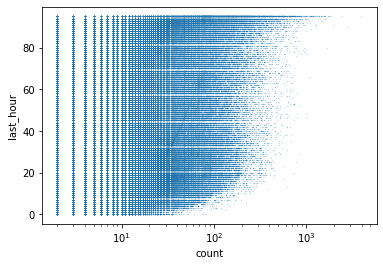

In [68]:
df_day1.iloc[::9].plot.scatter(y="last_hour", x="count", logx = True, s=0.01)

In [71]:
df_day1.last_hour.value_counts()[20:40]

20.0    270888
21.0    213009
22.0    200525
24.0    196708
23.0    195881
25.0    186962
26.0    181553
27.0    178566
28.0    171428
29.0    164566
30.0    162593
31.0    153874
33.0    146689
32.0    143594
35.0    140236
37.0    139787
39.0    138886
34.0    137315
36.0    133124
38.0    126810
40.0    120332
Name: last_hour, dtype: int64

In [11]:
len(df_day1)

17578124

In [7]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [72]:
df_day1=read_processed_day1()
# remember to remove A_min in the dataset
# it's just zeros (obv..)
# and rename the columns in the tsv
df_day1.drop('A_min', axis = 1, inplace = True)
df_day1.rename(columns={"A_max": "last_mention", 'A_count':'count'}, inplace = True)

In [73]:
df_day1.sort_values(by = 'last_mention', inplace = True)
df_day1['numbering'] = np.arange(len(df_day1))

In [74]:
df_day1['last_hour'] = df_day1['last_mention']/timedelta(minutes = 15)

In [78]:
df_day1

last_mention  count  numbering  last_hour
GlobalEventID                                             
813415302     0 days 00:00:00      2          0        0.0
769864127     0 days 00:00:00      4          1        0.0
769864126     0 days 00:00:00      4          2        0.0
769864111     0 days 00:00:00      4          3        0.0
769864099     0 days 00:00:00      4          4        0.0
...                       ...    ...        ...        ...
811786121     0 days 23:45:00     23   17578119       95.0
811786114     0 days 23:45:00    910   17578120       95.0
811786110     0 days 23:45:00    436   17578121       95.0
740200559     0 days 23:45:00      6   17578122       95.0
752097150     0 days 23:45:00      9   17578123       95.0

[17578124 rows x 4 columns]

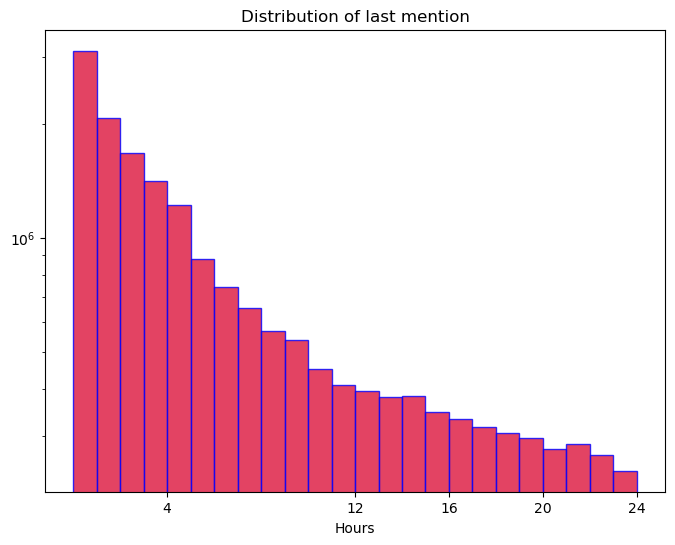

In [87]:
f, ax = plt.subplots( figsize = (8,6))

ndays = 1
start = 0
ore = (df_day1.last_mention/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax.bar(coor[:-1], val,align = 'edge', color = 'crimson', edgecolor = 'blue', width = 1, alpha = 0.8, log = True)
ax.set_xticks([4,12,16,20,24])
ax.set_title('Distribution of last mention')
ax.set_xlabel(f'Hours')

#ax.plot([24]*50, np.linspace(0, val.max(), 50), '--', label = '24 Hours')


plt.savefig('Distribution of last mentions of only the Events that do not reach day2.png', dpi = 200, bbox_inches = 'tight')
plt.show()

<AxesSubplot:>

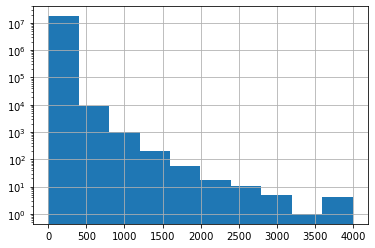

In [47]:
df_day1['count'].hist(log = True)#, bins = 10, range = [2000,3000])

<AxesSubplot:xlabel='numbering', ylabel='last_hour'>

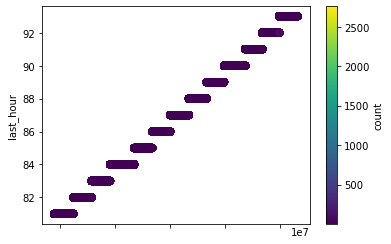

In [80]:
df_day1.loc[(df_day1['last_hour']>80)&(df_day1['last_hour']<94)].plot.scatter(y="last_hour", x='numbering', c="count",cmap="viridis", s=50)

<AxesSubplot:xlabel='count', ylabel='last_hour'>

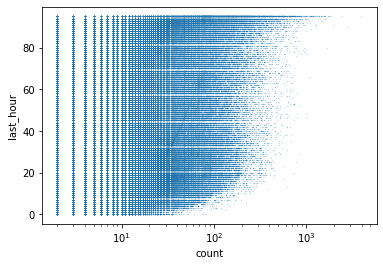

In [68]:
df_day1.iloc[::9].plot.scatter(y="last_hour", x="count", logx = True, s=0.01)

In [71]:
df_day1.last_hour.value_counts()[20:40]

20.0    270888
21.0    213009
22.0    200525
24.0    196708
23.0    195881
25.0    186962
26.0    181553
27.0    178566
28.0    171428
29.0    164566
30.0    162593
31.0    153874
33.0    146689
32.0    143594
35.0    140236
37.0    139787
39.0    138886
34.0    137315
36.0    133124
38.0    126810
40.0    120332
Name: last_hour, dtype: int64

# Analysis DF and group comparison

In [2]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

In [3]:
df=read_processed()

In [4]:
df

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024898     0 days 0 days 23:45:00      140             NaT             NaT   
719024938     0 days 0 days 23:45:00       66 1 days 09:30:00 1 days 09:30:00   
719024947     0 days 0 days 19:00:00        2             NaT             NaT   
719024948     0 days 0 days 00:00:00        2 1 days 00:00:00 1 days 06:30:00   
719024953     0 days 0 days 23:45:00       39             NaT             NaT   
...              ...             ...      ...             ...             ...   
813183236     0 days 0 days 02:45:00        2 1 days 01:00:00 1 days 01:00:00   
813189972     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813190065     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813200692     0 days 0 days 02:45:00        2 1 days 02:15:00 1 days 02:15:00   
813206189     0 days 0 days 04:45:00        3 1 days 01:30:00 1 days 01:30:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024898             0             NaT             NaT        0   NaT   NaT   
719024938             1             NaT             NaT        0   NaT   NaT   
719024947             0 7 days 14:45:00 7 days 14:45:00        1   NaT   NaT   
719024948            13 7 days 01:15:00 7 days 01:15:00        1   NaT   NaT   
719024953             0 7 days 16:30:00 7 days 20:15:00        2   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
813183236             1             NaT             NaT        0   NaT   NaT   
813189972             1             NaT             NaT        0   NaT   NaT   
813190065             1             NaT             NaT        0   NaT   NaT   
813200692             1             NaT             NaT        0   NaT   NaT   
813206189             1             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024898            0 30 days 01:45:00 30 days 06:45:00        2  
719024938            0              NaT              NaT        0  
719024947            0              NaT              NaT        0  
719024948            0              NaT              NaT        0  
719024953            0              NaT              NaT        0  
...                ...              ...              ...      ...  
813183236            0              NaT              NaT        0  
813189972            0              NaT              NaT        0  
813190065            0              NaT              NaT        0  
813200692            0              NaT              NaT        0  
813206189            0              NaT              NaT        0  

[258873 rows x 15 columns]

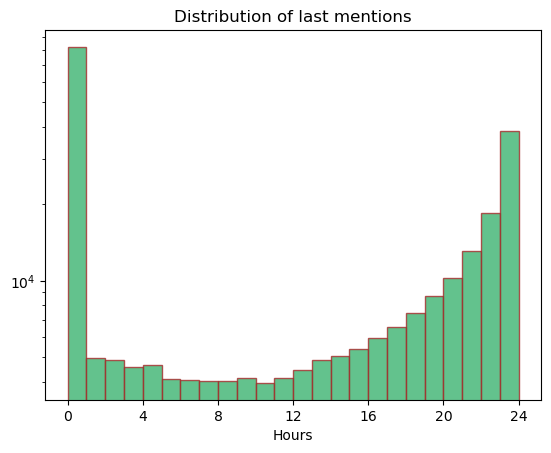

In [138]:
plt.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8, log = True)
plt.xticks([0,4,8,12,16,20,24])
plt.title('Distribution of last mentions')
plt.xlabel('Hours')
plt.show()

<AxesSubplot:>

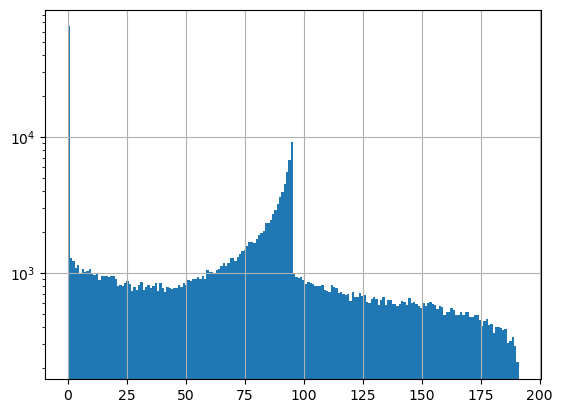

In [139]:
df['Z_count']=df['A_count']+df['A2_count']
df['Z_max']=df[['A_max' , 'A2_max']].max(axis=1)

In [177]:
ore.max()

191.75

In [190]:
val

array([72399,   141,    26,    17,     2,     4,     0,     0,     0,
           1])

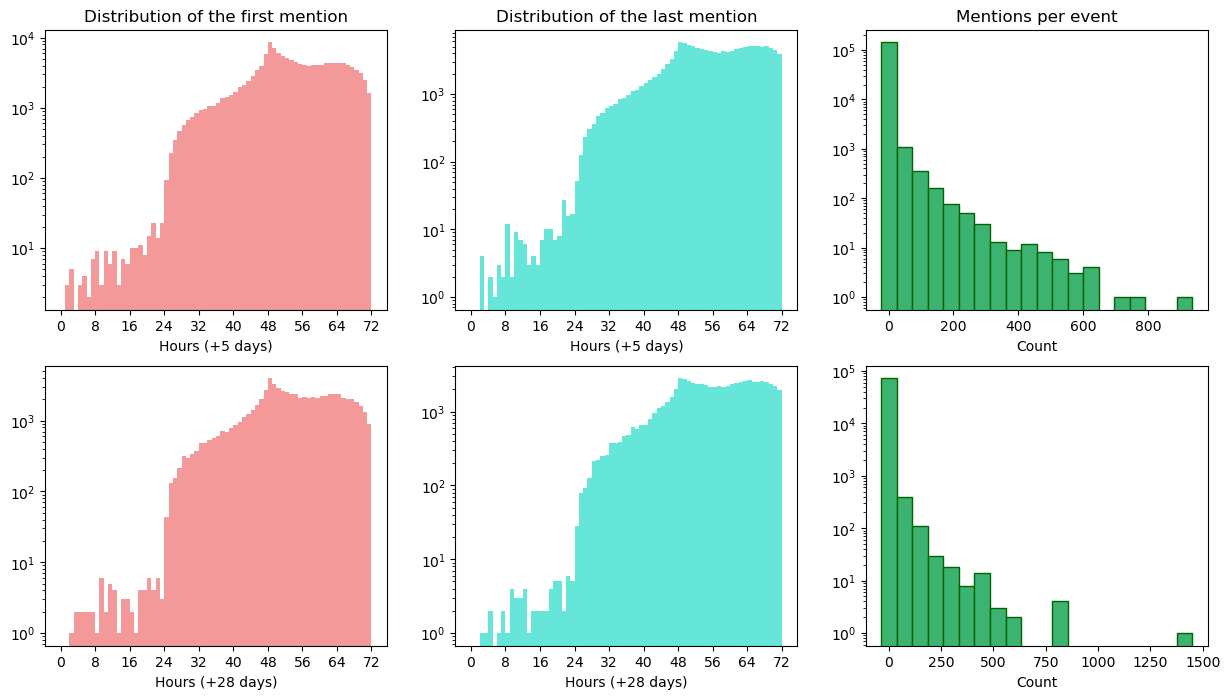

In [254]:
ndays = 3

f, ax = plt.subplots(2, 3, figsize = (15,8))

start = 5
ore = (df[df.B_count>0]['B_min']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax[0][0].bar(coor[:-1], val,align = 'edge', color = 'lightcoral', width = 1, alpha = 0.8, log = True)
ax[0][0].set_xticks(np.arange(0,24*ndays+1,8))
ax[0][0].set_title('Distribution of the first mention')
ax[0][0].set_xlabel(f'Hours (+{start} days)')

ore = (df[df.B_count>0]['B_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax[0][1].bar(coor[:-1], val,align = 'edge', color = 'turquoise', width = 1, alpha = 0.8, log = True)
ax[0][1].set_xticks(np.arange(0,24*ndays+1,8))
ax[0][1].set_title('Distribution of the last mention')
ax[0][1].set_xlabel(f'Hours (+{start} days)')


start = 28
ore = (df[df.D_count>0]['D_min']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax[1][0].bar(coor[:-1], val,align = 'edge', color = 'lightcoral', width = 1, alpha = 0.8, log = True)
ax[1][0].set_xticks(np.arange(0,24*ndays+1,8))
ax[1][0].set_xlabel(f'Hours (+{start} days)')

ore = (df[df.D_count>0]['D_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax[1][1].bar(coor[:-1], val,align = 'edge', color = 'turquoise', width = 1, alpha = 0.8, log = True)
ax[1][1].set_xticks(np.arange(0,24*ndays+1,8))
ax[1][1].set_xlabel(f'Hours (+{start} days)')


nbin = 20
ore = (df[df.B_count>0]['B_count']).to_numpy()
val, coor = np.histogram(ore,bins = nbin)

ax[0][2].bar(coor[:-1], val,align = 'center', color = 'mediumseagreen', width = (coor.max()-coor.min())/nbin, edgecolor = to_rgba('darkgreen',alpha = 1), alpha = 1, log = True)
ax[0][2].set_title('Mentions per event')
ax[0][2].set_xlabel(f'Count')

nbin = 20
ore = (df[df.D_count>0]['D_count']).to_numpy()
val, coor = np.histogram(ore,bins = nbin)

ax[1][2].bar(coor[:-1], val,align = 'center', color = 'mediumseagreen', width = (coor.max()-coor.min())/nbin, edgecolor = to_rgba('darkgreen',alpha = 1), alpha = 1, log = True)
ax[1][2].set_xlabel(f'Count')

plt.savefig('group_BD.png', dpi = 200, bbox_inches = 'tight')
plt.show()

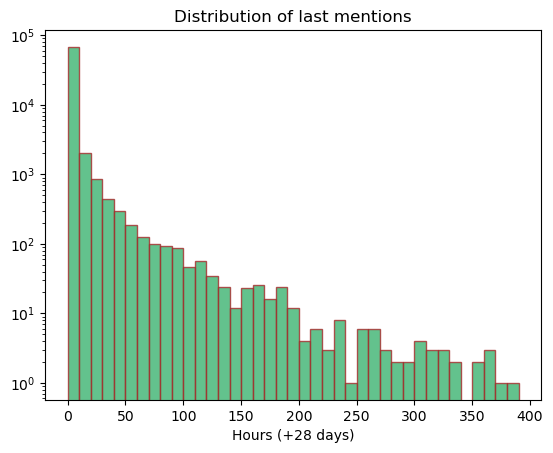

In [227]:

ore = (df[df.D_count>0]['D_count']).to_numpy()
val, coor = np.histogram(ore, bins = np.arange(0,400,10))
#coor -= 28*24

plt.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 10, edgecolor = 'brown', alpha = 0.8, log = True)
#plt.xticks(np.arange(0,73,4))
plt.title('Distribution of last mentions')
plt.xlabel('Hours (+28 days)')
plt.show()



ndays = 2
start = 22

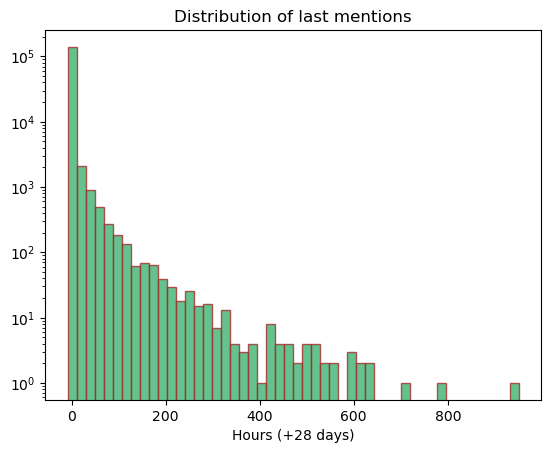

In [245]:
ore = (df[df.B_count>0]['B_count']).to_numpy()
val, coor = np.histogram(ore,bins = 50)#, bins = np.arange(0,400,10))
#coor -= 28*24

plt.bar(coor[:-1], val,align = 'center', color = 'mediumseagreen', width = (coor.max()-coor.min())/50, edgecolor = to_rgba('brown',alpha = 0.3), alpha = 0.8, log = True)
plt.title('Distribution of last mentions')
plt.xlabel('Hours (+28 days)')
plt.show()

In [235]:
coor.min()

1.0

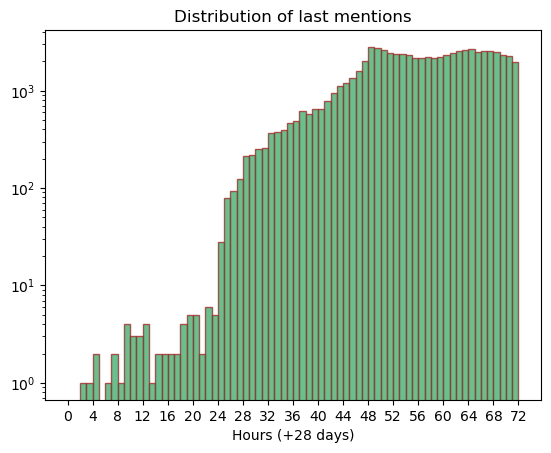

In [184]:
ore = (df[df.D_count>0]['D_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = 28*24+np.arange(0,24*3+1))
coor -= 28*24

plt.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8, log = True)
plt.xticks(np.arange(0,73,4))
plt.title('Distribution of last mentions')
plt.xlabel('Hours (+28 days)')
plt.show()

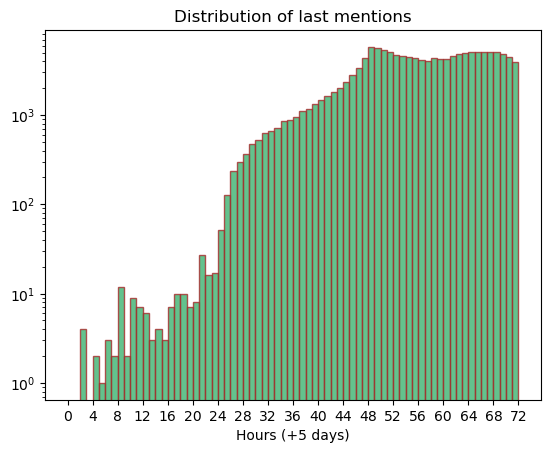

In [183]:
ore = (df[df.B_count>0]['B_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = 5*24+np.arange(0,24*3+1))
coor -= 5*24

plt.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8, log = True)
plt.xticks(np.arange(0,73,4))
plt.title('Distribution of last mentions')
plt.xlabel('Hours (+5 days)')
plt.show()

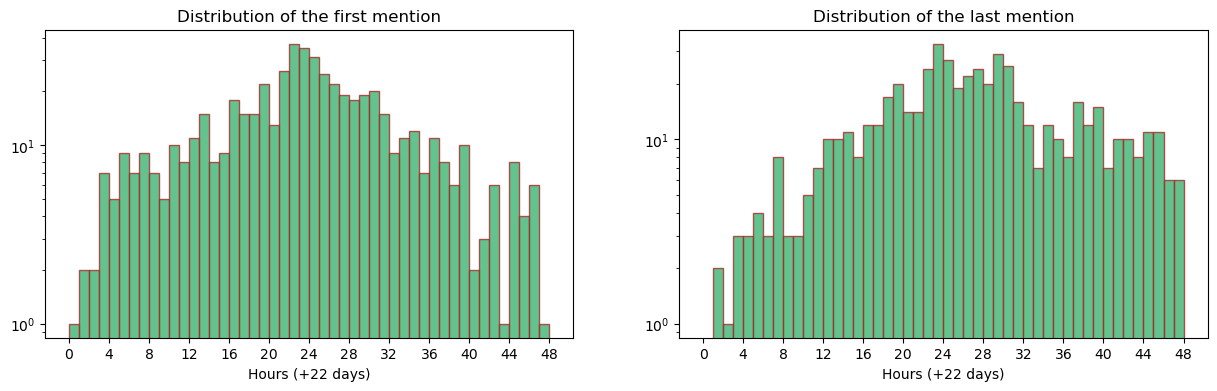

In [225]:
ndays = 2
start = 22

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))


ore = (df[df.C_count>0]['C_min']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax1.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8, log = True)
ax1.set_xticks(np.arange(0,24*ndays+1,4))
ax1.set_title('Distribution of the first mention')
ax1.set_xlabel(f'Hours (+{start} days)')

ore = (df[df.C_count>0]['C_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax2.bar(coor[:-1], val,align = 'edge', color = 'mediumseagreen', width = 1, edgecolor = 'brown', alpha = 0.8, log = True)
ax2.set_xticks(np.arange(0,24*ndays+1,4))
ax2.set_title('Distribution of the last mention')
ax2.set_xlabel(f'Hours (+{start} days)')


plt.savefig('group_C.png', dpi = 200, bbox_inches = 'tight')
plt.show()

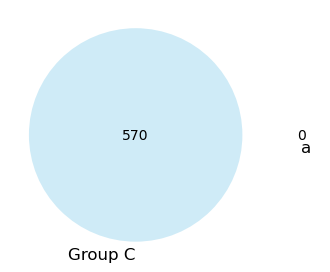

In [301]:
fig, ax = plt.subplots(figsize = (4,4))

venn.venn2(subsets = (570,0,0), set_colors=('skyblue', 'skyblue'), set_labels = ('Group C', 'a'))
plt.savefig('venn_C.png', transparent=True, dpi = 200)

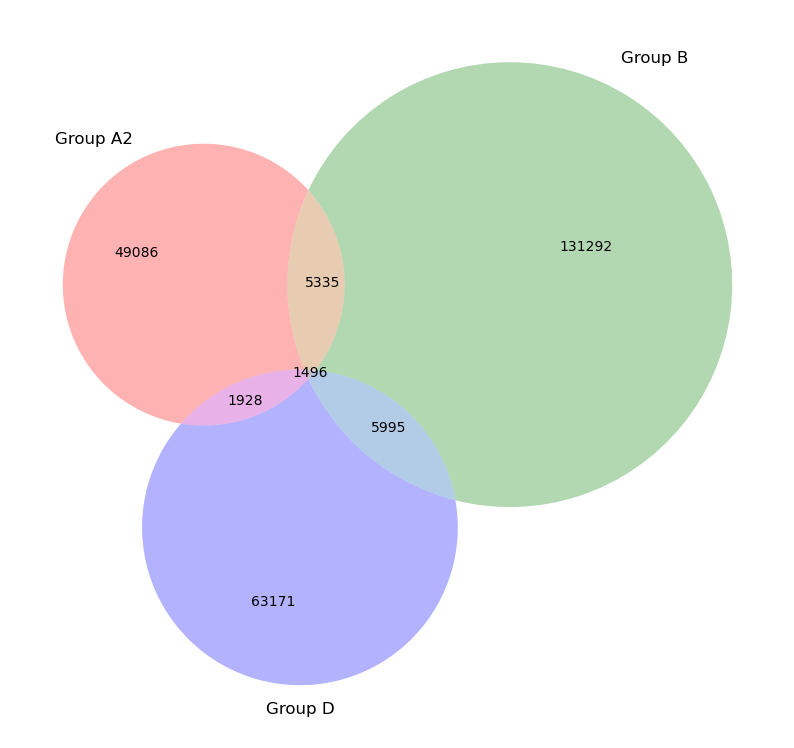

In [302]:


fig, ax = plt.subplots(figsize = (10,10))
venn.venn3(subsets = (49086, 131292, 5335, 63171,1928,5995,1496), set_labels = ('Group A2', 'Group B', 'Group D'), alpha = 0.3)
plt.savefig('venn_BD.png', transparent=True, dpi = 200)

In [291]:
len(df[(df.A2_count>0)&(df.B_count>0)&(df.D_count>0)])
len(df[(df.C_count>0)])

570

In [303]:
df['Z_count']=df['A_count']+df['A2_count']

In [304]:
df['Z_max']=df[['A_max' , 'A2_max']].max(axis=1)

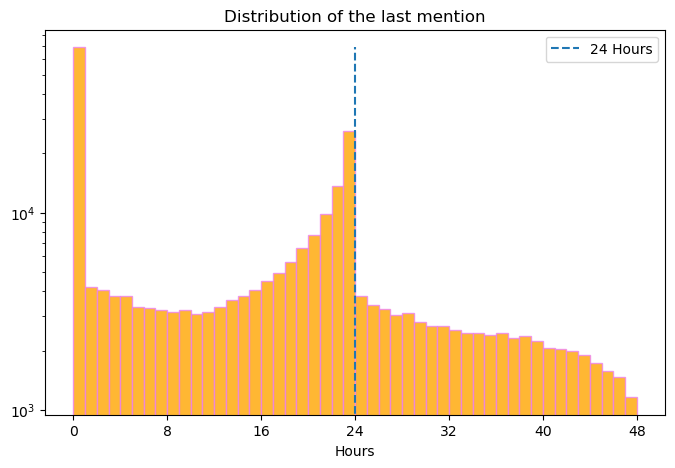

In [320]:

f, ax = plt.subplots( figsize = (8,5))

ndays = 2
start = 0
ore = (df['Z_max']/timedelta(hours=1)).to_numpy()
val, coor = np.histogram(ore, bins = start*24+np.arange(0,24*ndays+1))
coor -= start*24

ax.bar(coor[:-1], val,align = 'edge', color = 'orange', edgecolor = 'violet', width = 1, alpha = 0.8, log = True)
ax.set_xticks(np.arange(0,24*ndays+1,8))
ax.set_title('Distribution of the last mention')
ax.set_xlabel(f'Hours')

ax.plot([24]*50, np.linspace(0, val.max(), 50), '--', label = '24 Hours')

plt.legend()

plt.savefig('group_A_A2.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [208]:
ore.max()

575.75

In [211]:
24*24

576

In [203]:
df.C_count.sum()

5833

<AxesSubplot:>

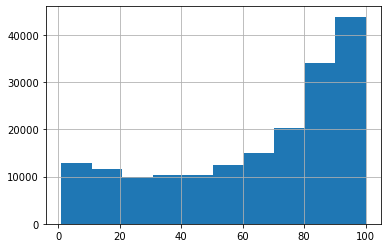

In [99]:
(df.A_max/timedelta(minutes=15)).hist(range=[1,100])

In [98]:
(df.A_max/timedelta(minutes = 15)).value_counts().sort_index()

0.0     78318
1.0      1484
2.0      1441
3.0      1271
4.0      1320
        ...  
91.0     5346
92.0     6246
93.0     7810
94.0     9980
95.0    14428
Name: A_max, Length: 96, dtype: int64

In [ ]:
df.loc[df.A_max/timedelta(minutes = 15) == 0].A_count.value_counts()

In [128]:
axs[0][0]

<AxesSubplot:>

[]

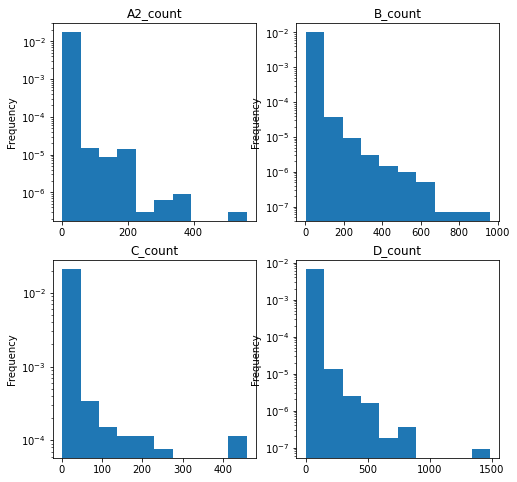

In [133]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df[col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

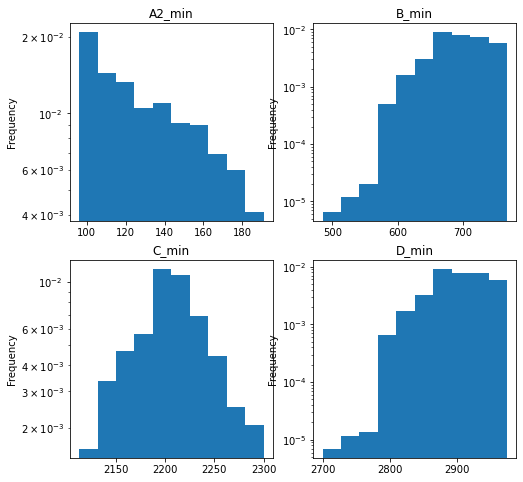

In [138]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = mins[ncol*row + col+1]
        (df[col_name].loc[np.logical_not(df[col_name].isna())]/timedelta(minutes = 15)).plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

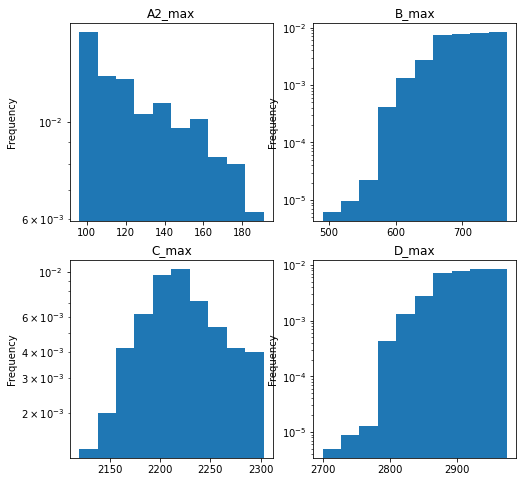

In [139]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = maxs[ncol*row + col+1]
        (df[col_name].loc[np.logical_not(df[col_name].isna())]/timedelta(minutes = 15)).plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

In [148]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.A2_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

[]

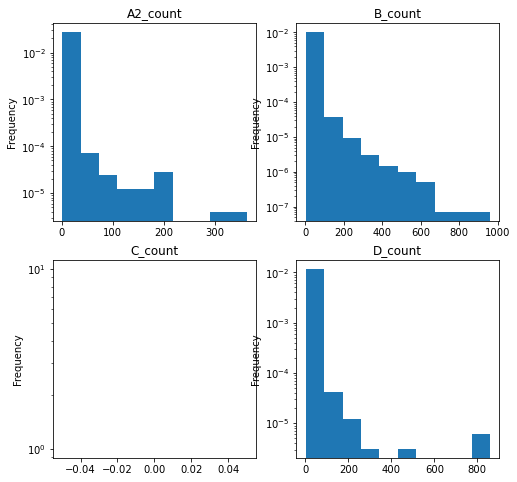

In [149]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.B_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

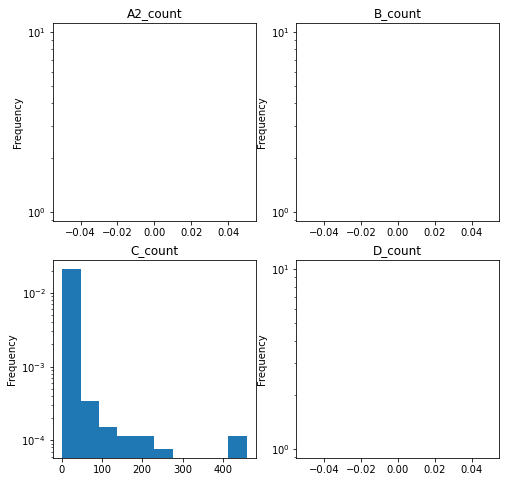

In [150]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.C_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

[]

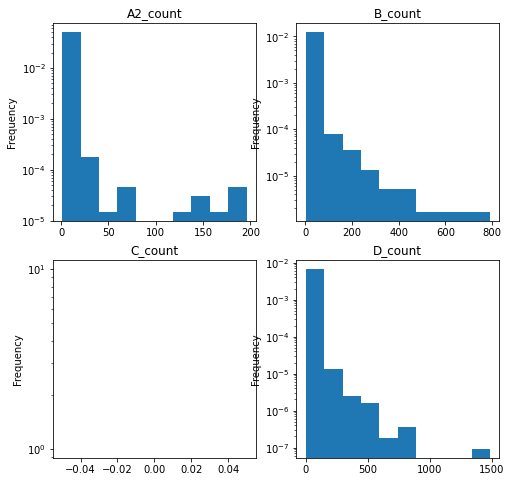

In [151]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name = counts[ncol*row + col+1]
        df.loc[df.D_count>0][col_name].loc[df[col_name]>0].plot(kind='hist',subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '')

plt.plot()

In [ ]:
mins=["A_min", 'A2_min', 'B_min', 'C_min', 'D_min']
maxs=["A_max", 'A2_max', 'B_max', 'C_max', 'D_max']
counts=["A_count", 'A2_count', 'B_count', 'C_count', 'D_count']

[]

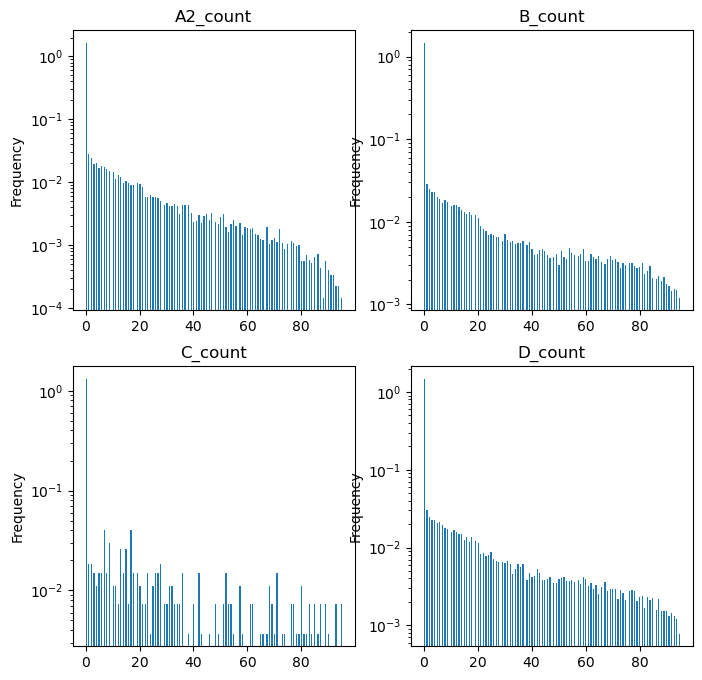

In [22]:
nrow, ncol = (2,2)
fig, axs = plt.subplots(nrow, ncol)
fig.set_size_inches(8,8)

for row in range(nrow):
    for col in range(ncol):
        col_name=counts[ncol*row + col+1]
        col_name_min= mins[ncol*row + col+1]
        col_name_max= maxs[ncol*row + col+1]
        ((df[col_name_max]-df[col_name_min]).loc[df[col_name]>-1]/timedelta(minutes = 15)).plot(kind='hist',
        subplots=False,title=col_name, log = True, ax = axs[row][col], density = True, ylabel = '', bins=200)

plt.plot()

In [35]:
A=(((df['D_max']-df['D_min']).loc[df['D_count']>0]/timedelta(minutes = 15)).value_counts())/(((df['D_max']-df['D_min']).loc[df['D_count']>0]/timedelta(minutes = 15)).value_counts()).sum()
B=((df['B_max']-df['B_min']).loc[df['B_count']>0]/timedelta(minutes = 15)).value_counts()/((df['B_max']-df['B_min']).loc[df['B_count']>0]/timedelta(minutes = 15)).value_counts().sum()

In [41]:
np.sqrt(((A-B)**2).sum())/96

5.720368742506858e-05

In [9]:
df.loc[(df["B_count"] > 0) & (df["D_count"] > 0)]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025098     0 days 0 days 00:00:00        1             NaT             NaT   
719025105     0 days 0 days 00:00:00        2             NaT             NaT   
719025107     0 days 0 days 00:00:00        1             NaT             NaT   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719026854     0 days 0 days 23:30:00       87             NaT             NaT   
...              ...             ...      ...             ...             ...   
806518198     0 days 0 days 15:00:00        2             NaT             NaT   
806754471     0 days 0 days 00:00:00        1             NaT             NaT   
806754650     0 days 0 days 23:45:00      959             NaT             NaT   
806755475     0 days 0 days 23:45:00      239 1 days 08:15:00 1 days 23:45:00   
806759777     0 days 0 days 00:00:00        1             NaT             NaT   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025098             0 7 days 14:15:00 7 days 19:30:00        2   NaT   NaT   
719025105             0 7 days 12:15:00 7 days 14:15:00        3   NaT   NaT   
719025107             0 7 days 16:30:00 7 days 16:30:00        1   NaT   NaT   
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719026854             0 7 days 00:00:00 7 days 23:15:00       61   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
806518198             0 6 days 19:30:00 6 days 23:45:00        3   NaT   NaT   
806754471             0 7 days 02:30:00 7 days 02:30:00        1   NaT   NaT   
806754650             0 7 days 05:15:00 7 days 05:15:00        1   NaT   NaT   
806755475             7 7 days 08:45:00 7 days 08:45:00        1   NaT   NaT   
806759777             0 7 days 05:00:00 7 days 05:00:00        1   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025098            0 30 days 23:00:00 30 days 23:00:00        1  
719025105            0 30 days 23:00:00 30 days 23:00:00        1  
719025107            0 30 days 00:45:00 30 days 02:45:00        4  
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719026854            0 30 days 00:45:00 30 days 21:15:00        6  
...                ...              ...              ...      ...  
806518198            0 30 days 09:45:00 30 days 09:45:00        1  
806754471            0 30 days 12:30:00 30 days 12:30:00        1  
806754650            0 30 days 21:15:00 30 days 21:15:00        1  
806755475            0 30 days 19:00:00 30 days 19:00:00        1  
806759777            0 30 days 21:00:00 30 days 21:00:00        1  

[7491 rows x 15 columns]

Diocane
Giacchè i 2 gruppi B e D hanno pochi elementi in comune (RM) il fatto che le loro distribuzioni siano simili è una proprietà di gruppo e non degli elementi che lo compongono

<AxesSubplot:>

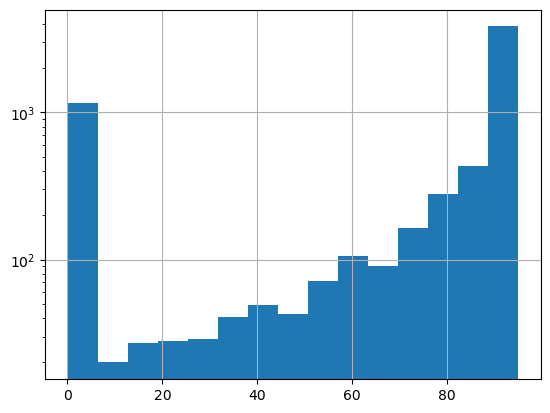

In [38]:
(df.loc[(df["B_count"]  + df["D_count"] > 0 ) & df['A2_count'] >0].A_max/timedelta(minutes = 15)).hist(log=True , bins=15)

In [39]:
df['Z_count']=df['A_count']+df['A2_count']

In [41]:
df['Z_max']=df[['A_max' , 'A2_max']].max(axis=1)

<AxesSubplot:>

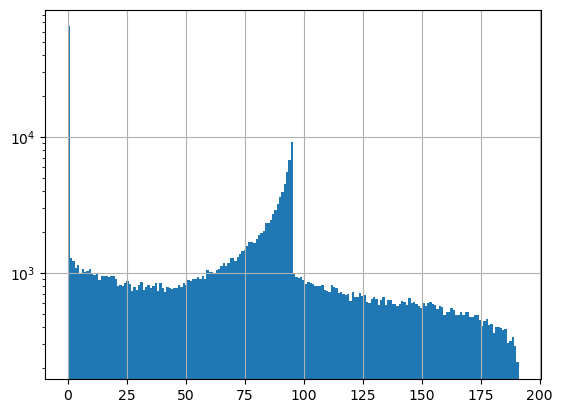

In [43]:
(df['Z_max']/timedelta(minutes=15)).hist(log=True, bins= 192)

<AxesSubplot:>

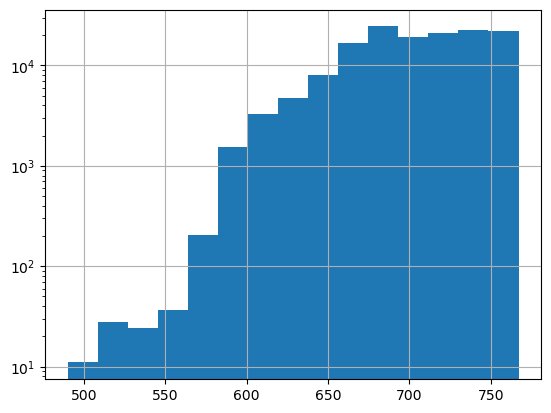

In [36]:
(df.loc[(df["B_count"]> 0)].B_max/timedelta(minutes = 15)).hist(log=True, bins=15)

In [46]:
800/96

8.333333333333334

<AxesSubplot:>

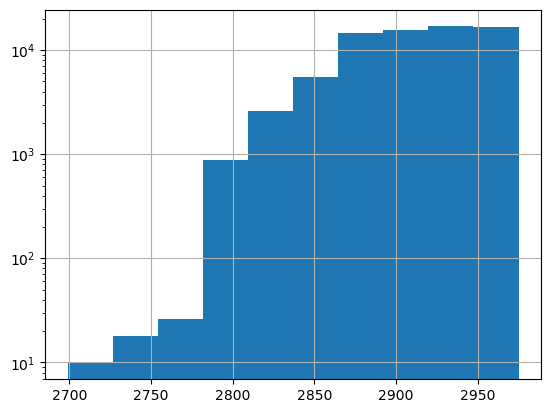

In [30]:
(df.loc[(df["D_count"]> 0)].D_max/timedelta(minutes = 15)).hist(log=True)

In [50]:
df['D_max'].max()-df['D_min'].min()

Timedelta('2 days 21:00:00')

In [49]:
df['B_max'].max()-df['B_min'].min()

Timedelta('2 days 22:30:00')